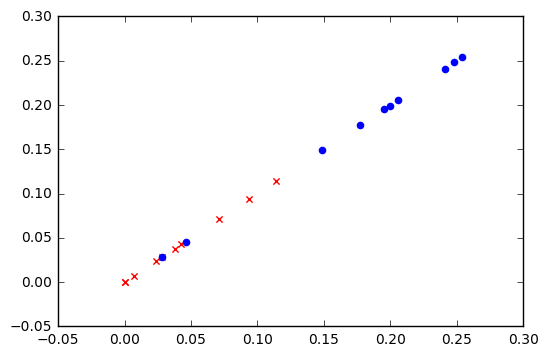

ValueError: too many values to unpack (expected 2)

In [29]:
from numpy import * 
import numpy as np
def file2matrix (filename): 
    f = open(filename) 
    arrayofline = f.readlines()
    numberoflines = len(arrayofline) 
    returnmat = zeros((numberoflines,4)) 
    classlabel = []
    index = 0 
    for line in arrayofline: 
        line = line.strip() 
        listofline = line.split('\t') 
        returnmat[index,:] = listofline[4:8]
        index += 1 
        classlabel.append(listofline[-1]) 
    return returnmat,classlabel 

def normalise (dataset): 
    minVals = dataset.min(0) 
    maxVals = dataset.max(0) 
    Ranges = maxVals - minVals 
    m,n = shape(dataset) 
    normat = zeros(shape(dataset)) 
    normat = dataset - tile(minVals,(m,1)) 
    normat = normat/tile(Ranges,(m,1)) 
    return normat,Ranges,minVals

def trainingset (): 
    x,y = file2matrix('C:/Users/DELL/Desktop/Book3.txt') 
    x1,Range,minvals = normalise(x)
    hoRatio = 0.80 
    m = x.shape[0]
    numTrain = int(hoRatio * m)
    X_train = x1[:numTrain,:] 
    X_test = x1[numTrain:m,:]
    y_train = y[:numTrain]
    y_test = y[numTrain:]
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = trainingset() 

def trainloader_1(): 
    X = list(X_train[:,[0,3]])
    y = list(y_train[:,[0,3]])
    return X,y 
def testloader_1(): 
    X1 = list(X_test[:,[0,3]])
    y1 = list((y_test[:,[0,3]]))
    return x1,y1 


import matplotlib.pyplot as plt 
X_train
plt.scatter(X_train[:5,[0,3]],X_train[:5,[0,3]],color='red',marker = 'x',label = '')
plt.scatter(X_train[5:10,[0,3]],X_train[5:10,[0,3]],color='blue',marker = 'o',label = '')
plt.show()
## 0 - Murder as X feature
## 3 - Assault as an X feature

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    #for i, data in enumerate(trainloader, 0):
    for i , data in enumerate(trainloader,0): 
        # get the inputs
        #inputs, labels = data
        X,y= data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

dataiter = iter(trainloader)
dataiter = iter(testloader)
#images, labels = dataiter1.next()
#images, labels = dataiter2.next()
X_train,y_train = dataiter.next()
X_test,y_test = dataiter.next()

correct = 0
total = 0
with torch.no_grad():
    #for data in testloader:
    for data in testloader: 
        #images, labels = data
        x1,y1= data
        #outputs = net(images)
        outputs = net(X_test)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        #correct += (predicted == labels).sum().item()
        correct += (predicted == y_test).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
